Modeling Preference Learning using Bayesian Inference

Developer: Tanmoy Das <br>
Date: June 13, 2022

Outline: 
- Data processing <br>
- Modeling <br>
- Model Assessment and Validation <br>
- Model Selection

Content for the manuscript:
- Figure 6: Visualizing performance of the full model; ROC curve of multiclass of MCR, CDU and ISB are shown in (a), (b), (c), respectively.

# Data  

In [1]:
# Import required Python libraries
# Data import 
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier 

# Metric
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, label_ranking_average_precision_score
from sklearn import metrics

# Visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# Saving model
import pickle


In [2]:
# import data
data_engineered_PLeR_modeling = pd.read_excel("Inputs/data_engineered_PLeR_Modeling input.xlsx", index_col='Scene no.').copy()
data_engineered_PLeR_modeling = data_engineered_PLeR_modeling.rename({'mcr_DT_output': 'MCR options', 'cdu_DT_output': 'CDU options', 'isb_DT_output':'ISB options'}, axis='columns')
display(data_engineered_PLeR_modeling)
display(data_engineered_PLeR_modeling.info())
display(data_engineered_PLeR_modeling.columns)

,evaporation_and_natural_disperson,persistence,oil_amount_to_recover,E_ss,E_sl,E_sw,E_sb,E_ssC,E_slC,E_swC,...,distance_to_inhabitation,soot_pollution,sufficient_mixing_energy,seasurface,residue_recovery,displacement,seawater,MCR options,CDU options,ISB options
Scene no.,,,,,,,,,,,,,,,,,,,,,
Scene 1,0.325843,0,0.911472,0.5,0.5,0.5,1.0,1.0,0.5,0.0,...,0.973415,1,1,0,1,0,0,10,-10,8
Scene 2,0.483146,1,0.768039,0.5,0.0,0.5,0.5,0.5,0.5,0.5,...,0.349693,1,0,0,0,1,0,-2,-10,10
Scene 3,0.764045,1,0.080379,1.0,0.5,0.5,0.0,0.5,0.5,0.5,...,0.032720,1,1,0,1,1,0,10,10,10
Scene 4,0.910112,0,0.385508,0.5,0.5,0.5,0.0,0.5,0.5,0.5,...,0.619632,1,1,0,1,0,0,10,-10,8
Scene 5,0.393258,1,0.335290,1.0,0.5,0.5,0.5,0.5,0.5,0.5,...,0.615542,0,0,0,0,0,0,-2,-10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Scene 3096,0.539326,0,0.252365,0.5,1.0,0.5,0.5,0.5,0.0,0.5,...,0.447853,0,0,0,1,0,0,10,-10,10
Scene 3097,0.449438,1,0.545030,0.5,1.0,0.5,0.5,0.5,0.0,0.5,...,0.085890,0,0,0,0,0,0,10,-10,10
Scene 3098,0.483146,1,0.074920,1.0,0.0,0.5,0.5,1.0,0.5,0.5,...,0.249489,1,0,0,0,1,0,10,-10,-2


<class 'pandas.core.frame.DataFrame'>
Index: 3100 entries, Scene 1 to Scene 3100
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   evaporation_and_natural_disperson  3100 non-null   float64
 1   persistence                        3100 non-null   int64  
 2   oil_amount_to_recover              3100 non-null   float64
 3   E_ss                               3100 non-null   float64
 4   E_sl                               3100 non-null   float64
 5   E_sw                               3100 non-null   float64
 6   E_sb                               3100 non-null   float64
 7   E_ssC                              3100 non-null   float64
 8   E_slC                              3100 non-null   float64
 9   E_swC                              3100 non-null   float64
 10  E_sbC                              3100 non-null   float64
 11  E_ssI                              3100 non-null 

None

Index(['evaporation_and_natural_disperson', 'persistence',
       'oil_amount_to_recover', 'E_ss', 'E_sl', 'E_sw', 'E_sb', 'E_ssC',
       'E_slC', 'E_swC', 'E_sbC', 'E_ssI', 'E_slI', 'E_swI', 'E_sbI',
       'water_temp', 'wind', 'air_temp', 'ice', 'oil_density', 'oil_viscosity',
       'retaining_capacity', 'shoreline_length', 'distance_to_inhabitation',
       'soot_pollution', 'sufficient_mixing_energy', 'seasurface',
       'residue_recovery', 'displacement', 'seawater', 'MCR options',
       'CDU options', 'ISB options'],
      dtype='object')

In [3]:
# Features & Target variables
X = data_engineered_PLeR_modeling.drop(columns=['MCR options', 'CDU options', 'ISB options'])
y = data_engineered_PLeR_modeling[['MCR options', 'CDU options', 'ISB options']]

In [4]:
# Save X & y
X.to_excel('Inputs/X.xlsx')
y.to_excel('Inputs/y.xlsx')

## Model for classifying MCR

### Data (Training and Test)

In [5]:
# Binarize multi-classes (e.g. [1, 2, 2, 3] will be converted into [[1, 0, 0, 0],[0, 1, 1, 0],[0, 1, 1, 0],[0, 0, 0, 1]]
# Binarization is needed to calculate FPR & other metric & to draw ROC curve for Multi-class (we dont need binarization for binary classification)
# Label binarizer will broadcast 1D array into multiclass array
# y = [0 ,1 , 2, 1, 0]
# y_label_binarize = [ [1, 0, 0, 0, 0], []] # similar data/array dimension changes happen in one-hot encoding

# Binarize the output
y_m_b = label_binarize(y['MCR options'], classes=[10, 8, 2, -2])
n_classes = y_m_b.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_m_b, test_size=0.20, random_state=12)


### Model Training

In [6]:
# modeling
model_GB_ins =  OneVsRestClassifier(GaussianNB())
model_GB = model_GB_ins.fit(X_train, y_train)

# model_gb_m = MultiOutputClassifier(model_GB).fit(X_train, y_train)

#MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)
# https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html
#Predict
y_pred = model_GB.predict(X_test)

y_score = model_GB.predict_proba(X_test)

# You should pass into roc_curve function result of decision_function (or some of two columns from predict_proba result) instead of actual predictions
# https://stackoverflow.com/questions/33208897/how-to-interpret-this-triangular-shape-roc-auc-curve/33218642#33218642

### Model Assessment

In [7]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test, y_pred, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_score, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovo
weighted_roc_auc_ovo

0.7320845578771991

#### ROC with class name

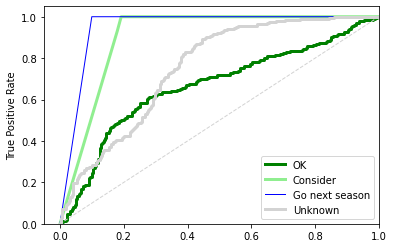

In [8]:
# Binarize the output
y_m_b = label_binarize(y['MCR options'], classes=[10, 8, 2, -2])
n_classes = y_m_b.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y_m_b, test_size=0.20, random_state=12)

# MCR 
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

fig2 = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
color_c = ['green', 'lightgreen', 'blue', 'lightgray']
class_c = ['OK', 'Consider', 'Go next season','Unknown']
lw = [3,3,1,3]
#linestyle = ['solid', 'dashed', '-.', '-.']
# opacity/ transparency in lineplot ++

for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], #, linestyle=linestyle[i]
             label=class_c[i]) 
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()
fig2.savefig('Outputs/ROC curve mcr, full, name.png', dpi = 600)

####  ROC curve with AUC values

In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

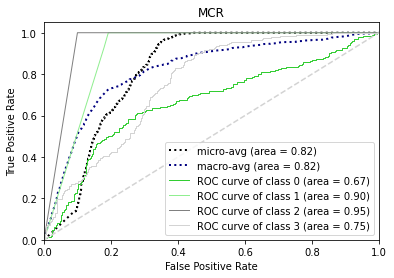

In [10]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-avg (area = {0:0.2f})".format(roc_auc["micro"]),
    color="black",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-avg (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

colors = cycle(['limegreen', 'lightgreen', 'gray', 'lightgray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MCR")
plt.legend(loc="lower right")
plt.show()

#### Confusion metric

In [11]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cm,
                     index = ['OK', 'Consider', 'Go next season', 'Unknown'], 
                     columns = ['OK', 'Consider', 'Go next season', 'Unknown'])
cm_df

,OK,Consider,Go next season,Unknown
OK,226,45,0,47
Consider,11,46,0,0
Go next season,7,21,0,0
Unknown,136,0,0,81


#### LRAP

In [12]:
label_ranking_average_precision_score(y_test, y_score)

0.7349462365591395

## Model for classifying CDU

In [13]:
display(y['CDU options'].value_counts())

-10    2042
 10     933
-2      120
 8        5
Name: CDU options, dtype: int64

### Data, Modeling and Assessment

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


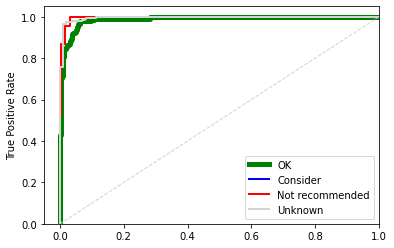

In [14]:
# Binarize the output
y_c_b = label_binarize(y['CDU options'], classes=[10, 8, -2, -10])
n_classes = y_c_b.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y_c_b, test_size=0.20, random_state=12)

# CDU 
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

fig2 = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
color_c = ['green', 'blue', 'red', 'lightgray']
class_c = ['OK', 'Consider', 'Not recommended','Unknown']
#linestyle = ['solid', 'dashed', '-.', '-.']
# opacity/ transparency in lineplot ++
lw = [5,2,2,2]
for i, color in zip(range(n_classes), color_c):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i], #, linestyle=linestyle[i]
             label=class_c[i]) 
plt.plot([0, 1], [0, 1], '--', color= 'lightgray',lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.legend(loc="lower right")

plt.show()
fig2.savefig('Outputs/ROC curve cdu, full, name.png', dpi = 600)

C:\Users\tanmo\.conda\envs\preference_py\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


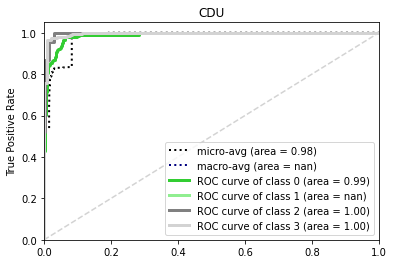

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig3 = plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-avg (area = {0:0.2f})".format(roc_auc["micro"]),
    color="black",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-avg (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)

colors = cycle(['limegreen', 'lightgreen', 'gray', 'lightgray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CDU")
plt.legend(loc="lower right")
plt.show()

In [16]:
cm_c = multilabel_confusion_matrix(y_test, y_pred)
cm_c

array([[[314, 124],
        [  2, 180]],

       [[619,   1],
        [  0,   0]],

       [[570,  27],
        [  0,  23]],

       [[203,   2],
        [101, 314]]], dtype=int64)

In [17]:
cm_c = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(cm_c)

cm_df = pd.DataFrame(cm_c,
                     index = ['OK',  'Not recommended','Unknown'], 
                     columns = ['OK',   'Not recommended','Unknown'])
cm_df


array([[180,   0,   2],
       [ 23,   0,   0],
       [101,   0, 314]], dtype=int64)

,OK,Not recommended,Unknown
OK,180,0,2
Not recommended,23,0,0
Unknown,101,0,314


In [18]:
label_ranking_average_precision_score(y_test, y_score)

0.9030913978494624

## Model for classifying ISB

In [19]:
display(y['ISB options'].value_counts())
display(y['ISB options'])


 10    2098
 8      846
-2      156
Name: ISB options, dtype: int64

Scene no.
Scene 1        8
Scene 2       10
Scene 3       10
Scene 4        8
Scene 5       10
              ..
Scene 3096    10
Scene 3097    10
Scene 3098    -2
Scene 3099    10
Scene 3100     8
Name: ISB options, Length: 3100, dtype: int64

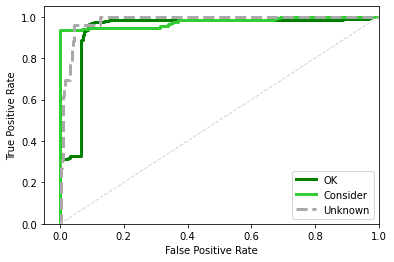

In [20]:
# Binarize the output
y_i_b = label_binarize(y['ISB options'], classes=[10, 8, -2])
n_classes = y_i_b.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y_i_b, test_size=0.20, random_state=12)

# ISB
classifier = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

fig4 = plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
color_i = ['green', 'limegreen',  'darkgray']
class_i = ['OK', 'Consider', 'Unknown']
linestyle = ['solid', 'solid', '--']

for i, color in zip(range(n_classes), color_i):
    plt.plot(fpr[i], tpr[i], color=color, lw=3, 
             label=class_i[i], linestyle=linestyle[i]) 
plt.plot([0, 1], [0, 1], '--', lw=1, color='lightgray')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

plt.show()
fig4.savefig('Outputs/ROC curve isb, full, name.png', dpi = 600)

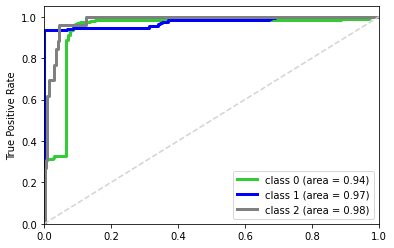

In [21]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig5 = plt.figure()
"""
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-avg (area = {0:0.2f})".format(roc_auc["micro"]),
    color="darkgray",
    linestyle=":",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-avg (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=2,
)
"""
colors = cycle(['limegreen', 'blue', 'gray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=3,
        label="class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "--", color='lightgray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [22]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm
cm_df = pd.DataFrame(cm,
                     index = ['OK', 'Consider',  'Unknown'], 
                     columns = ['OK', 'Consider', 'Unknown'])
cm_df

,OK,Consider,Unknown
OK,423,0,1
Consider,13,157,0
Unknown,25,0,1


In [23]:
cm_c = multilabel_confusion_matrix(y_test, y_pred)
cm_c

array([[[158,  38],
        [  6, 418]],

       [[450,   0],
        [ 11, 159]],

       [[505,  89],
        [  0,  26]]], dtype=int64)

## Miscell

In [24]:
classifier.get_params()

{'estimator__priors': None,
 'estimator__var_smoothing': 1e-09,
 'estimator': GaussianNB(),
 'n_jobs': None}

In [25]:
classifier.estimator.get_params()

{'priors': None, 'var_smoothing': 1e-09}

## Multioutput multiclass classification

In [26]:

X = data_engineered_PLeR_modeling.drop(columns=['MCR options', 'CDU options', 'ISB options'])
y = data_engineered_PLeR_modeling[['MCR options', 'CDU options', 'ISB options']]

# Drop y with Consider class which has only 5 records
#X
y = y[y['CDU options'] != 8]
X = X.drop(['Scene 26', 'Scene 1247', 'Scene 1380', 'Scene 1655', 'Scene 2109']) # y[y['CDU options'] == 8].index.values


# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)


In [27]:
display(y_train['CDU options'].value_counts())
display(y_test['CDU options'].value_counts())

-10    1628
 10     755
-2       93
Name: CDU options, dtype: int64

-10    414
 10    178
-2      27
Name: CDU options, dtype: int64

In [28]:
# Save training and testing data
X_train.to_excel('Inputs/X_train.xlsx')
X_test.to_excel('Inputs/X_test.xlsx')
y_train.to_excel('Inputs/y_train.xlsx')
y_test.to_excel('Inputs/y_test.xlsx')

In [29]:
# modeling
model_GB_ins =  GaussianNB()

model_gnb_multioutput = MultiOutputClassifier(model_GB_ins).fit(X_train, y_train)
# https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html

#Predict
y_pred = model_gnb_multioutput.predict(X_test)
y_score = model_gnb_multioutput.predict_proba(X_test)

### Predicting for single cases

In [30]:
y_pred = model_gnb_multioutput.predict(X_train)
i= 2336

print(y_pred[i])
print(y_train.iloc[i,:])
print(X_train.iloc[i,:])
# Table 4(a) Predicting for i = 3
# [10, -10, 10]

[-2 10  8]
MCR options    -2
CDU options    10
ISB options     8
Name: Scene 95, dtype: int64
evaporation_and_natural_disperson    0.606742
persistence                          0.000000
oil_amount_to_recover                0.148380
E_ss                                 0.500000
E_sl                                 1.000000
E_sw                                 0.500000
E_sb                                 0.000000
E_ssC                                0.500000
E_slC                                1.000000
E_swC                                0.000000
E_sbC                                1.000000
E_ssI                                0.500000
E_slI                                1.000000
E_swI                                0.500000
E_sbI                                1.000000
water_temp                           0.137255
wind                                 0.089888
air_temp                             0.196078
ice                                  0.545455
oil_density                     

In [31]:
X_train

,evaporation_and_natural_disperson,persistence,oil_amount_to_recover,E_ss,E_sl,E_sw,E_sb,E_ssC,E_slC,E_swC,...,oil_viscosity,retaining_capacity,shoreline_length,distance_to_inhabitation,soot_pollution,sufficient_mixing_energy,seasurface,residue_recovery,displacement,seawater
Scene no.,,,,,,,,,,,,,,,,,,,,,
Scene 2858,0.865169,1,0.904216,0.5,0.0,0.0,0.0,0.5,0.0,0.0,...,0.842105,1,0.815122,0.836401,1,0,0,0,1,0
Scene 2694,0.393258,1,0.323216,0.5,0.5,0.0,1.0,0.5,0.0,1.0,...,0.157895,1,0.922464,0.543967,0,1,0,1,1,0
Scene 1958,0.033708,1,0.520527,1.0,0.0,1.0,0.0,0.0,0.5,0.5,...,0.684211,1,0.029232,0.255624,0,0,0,0,1,0
Scene 3062,0.573034,1,0.208509,0.5,0.5,0.5,0.0,0.5,0.5,0.0,...,0.947368,1,0.836334,0.728016,1,0,0,0,0,0
Scene 1983,0.157303,1,0.487652,0.0,0.5,0.5,1.0,1.0,0.5,0.5,...,0.315789,1,0.805387,0.269939,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Scene 1992,0.561798,0,0.673217,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.473684,0,0.211542,1.000000,0,0,0,0,1,0
Scene 1286,0.449438,1,0.564469,0.5,0.5,0.5,1.0,0.5,0.5,0.5,...,0.684211,1,0.311780,0.723926,0,1,0,0,1,0
Scene 1418,0.595506,1,0.750606,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.368421,1,1.000000,0.936605,0,0,0,0,1,0


In [32]:
print('----------------------------Confusion Matrix--------------')
print('MCR')
cm_c = metrics.confusion_matrix(y_test.iloc[:,0], y_pred[:,0])
display(cm_c)
print('CDU')
cm_c = metrics.confusion_matrix(y_test.iloc[:,1], y_pred[:,1])
display(cm_c)
print('ISB')
cm_c = metrics.confusion_matrix(y_test.iloc[:,2], y_pred[:,2])
display(cm_c)

print('----------------------------Classification Report--------------')
print('MCR')
print(metrics.classification_report(y_test.iloc[:,0],y_pred[:,0]))
print('CDU')
print(metrics.classification_report(y_test.iloc[:,1],y_pred[:,1]))

print('ISB')
print(metrics.classification_report(y_test.iloc[:,2],y_pred[:,2]))

----------------------------Confusion Matrix--------------
MCR


ValueError: Found input variables with inconsistent numbers of samples: [619, 2476]

In [35]:
print('----------------------------ROC AUC--------------')
print('MCR')
print(metrics.roc_auc_score(y_test.iloc[:,0],y_score[0], multi_class='ovo'))
print('CDU')
print(metrics.roc_auc_score(y_test.iloc[:,1],y_score[1], multi_class='ovo'))
print('ISB')
print(metrics.roc_auc_score(y_test.iloc[:,2],y_score[2], multi_class='ovo'))


#print(len(y_score[1]))
#print(len(y_test.iloc[:,1]))

----------------------------ROC AUC--------------
MCR
0.8968282004136979
CDU
0.9858926928430177
ISB
0.9413510302783167


## Saving data & model

In [ ]:
# Save model
# Save the trained model as a pickle string.
# saved_model = pickle.dumps('Outputs/model_gb_multioutput.pkl')
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model_gnb_multioutput, 'Inputs/full_model_gnb_multioutput.pkl')

In [ ]:
# Information from this Python Notebook will be used to build the Reduced Model